# Dependencies and Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st

In [2]:
# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List 
## Part 1A


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
config = weather_api_key

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# set up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [6]:
# Loop through the list of cities and perform a request for data on each

print('Beginning Data Retrieval')     
print('-----------------------------')
i=0 

for city in cities:
    #print(f"query_url is : {query_url}")
    response = requests.get(query_url + city).json()
    #print(f"response is : {response}")
    cod = response['cod']
    if cod == 200: 
        i = i + 1
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'Processing Record {i} of Set 1 | {city}')
    else:
        print(f'City not found. Skipping...')
    
print(f'-----------------------------')
print(f'Data Retrieval Complete     ')
print(f'-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | vestmannaeyjar
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | muscat
Processing Record 7 of Set 1 | acajutla
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | tateyama
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | lagoa formosa
Processing Record 13 of Set 1 | jieshi
Processing Record 14 of Set 1 | kasakh
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | ios
City not found. Skipping...
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | mahebourg
Processing Record 23 of S

City not found. Skipping...
Processing Record 189 of Set 1 | paidha
Processing Record 190 of Set 1 | tiarei
Processing Record 191 of Set 1 | dumanjug
Processing Record 192 of Set 1 | tabuk
Processing Record 193 of Set 1 | otradnoye
Processing Record 194 of Set 1 | kondol
Processing Record 195 of Set 1 | jalu
Processing Record 196 of Set 1 | codrington
Processing Record 197 of Set 1 | sembakung
Processing Record 198 of Set 1 | tynda
Processing Record 199 of Set 1 | khani
Processing Record 200 of Set 1 | macae
Processing Record 201 of Set 1 | benghazi
Processing Record 202 of Set 1 | quiindy
Processing Record 203 of Set 1 | chapais
Processing Record 204 of Set 1 | fortuna
Processing Record 205 of Set 1 | provideniya
Processing Record 206 of Set 1 | bengkulu
Processing Record 207 of Set 1 | tual
Processing Record 208 of Set 1 | saint george
Processing Record 209 of Set 1 | luderitz
Processing Record 210 of Set 1 | kralendijk
Processing Record 211 of Set 1 | uruguaiana
Processing Record 21

Processing Record 376 of Set 1 | nuuk
Processing Record 377 of Set 1 | manassas
Processing Record 378 of Set 1 | sinnamary
Processing Record 379 of Set 1 | najran
Processing Record 380 of Set 1 | sabha
Processing Record 381 of Set 1 | warmbad
Processing Record 382 of Set 1 | peleduy
Processing Record 383 of Set 1 | half moon bay
Processing Record 384 of Set 1 | nelson bay
Processing Record 385 of Set 1 | aklavik
Processing Record 386 of Set 1 | tayu
Processing Record 387 of Set 1 | auki
Processing Record 388 of Set 1 | sinegorye
Processing Record 389 of Set 1 | yar-sale
Processing Record 390 of Set 1 | broome
Processing Record 391 of Set 1 | qufu
Processing Record 392 of Set 1 | zhigansk
Processing Record 393 of Set 1 | hailar
Processing Record 394 of Set 1 | hambantota
Processing Record 395 of Set 1 | aripuana
Processing Record 396 of Set 1 | terni
Processing Record 397 of Set 1 | sturgis
City not found. Skipping...
Processing Record 398 of Set 1 | brae
Processing Record 399 of Set 1 

Processing Record 567 of Set 1 | opuwo
Processing Record 568 of Set 1 | oeiras do para
Processing Record 569 of Set 1 | morondava
Processing Record 570 of Set 1 | mayo
Processing Record 571 of Set 1 | lethem
Processing Record 572 of Set 1 | sakaiminato
Processing Record 573 of Set 1 | praya
Processing Record 574 of Set 1 | kerrville
Processing Record 575 of Set 1 | loralai
Processing Record 576 of Set 1 | aksu
Processing Record 577 of Set 1 | balabac
Processing Record 578 of Set 1 | whitehorse
Processing Record 579 of Set 1 | drumheller
-----------------------------
Data Retrieval Complete     
-----------------------------


## Convert Raw Data to DataFrame
#### Export the city data into a .csv.
#### Display the DataFrame

In [7]:
# create a data frame from retreived weather data
weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}

In [8]:
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('WeatherPy_data.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,9,PF,1660408850,74,-9.8000,-139.0333,25.03,9.03
1,Vestmannaeyjar,100,IS,1660408850,76,63.4427,-20.2734,10.55,3.09
2,Rikitea,31,PF,1660408850,76,-23.1203,-134.9692,22.98,9.73
3,George Town,20,MY,1660408850,86,5.4112,100.3354,28.27,1.54
4,Punta Arenas,75,CL,1660408850,75,-53.1500,-70.9167,2.06,8.23


In [9]:
#Export the city data into a .csv.

# Save csv file
weather_data.to_csv("Weather_Data.csv", index=False)
weather_data.count()

City          579
Cloudiness    579
Country       579
Date          579
Humidity      579
Lat           579
Lng           579
Max Temp      579
Wind Speed    579
dtype: int64

In [10]:
# Inspect the data and remove the cities where the humidity > 100%.
humid_city_data = weather_data[(weather_data["Humidity"] > 100)].index
                                  
humid_city_data

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(humid_city_data, inplace=False)
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,9,PF,1660408850,74,-9.8000,-139.0333,25.03,9.03
1,Vestmannaeyjar,100,IS,1660408850,76,63.4427,-20.2734,10.55,3.09
2,Rikitea,31,PF,1660408850,76,-23.1203,-134.9692,22.98,9.73
3,George Town,20,MY,1660408850,86,5.4112,100.3354,28.27,1.54
4,Punta Arenas,75,CL,1660408850,75,-53.1500,-70.9167,2.06,8.23


### The first requirement is to create a series of scatter plots to showcase the following relationships:
Temperature (F) vs. Latitude

Humidity (%) vs. Latitude

Cloudiness (%) vs. Latitude

Wind Speed (mph) vs. Latitude

## Temperature (F) vs. Latitude

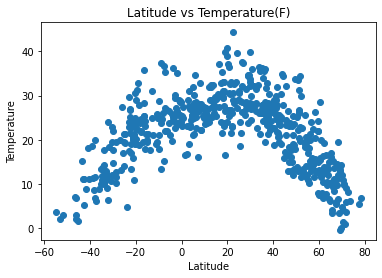

In [12]:
plt.figure(figsize = (6, 4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'])
plt.title("Latitude vs Temperature(F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

#save the plot
plt.savefig('lat_v_temp.png')
plt.show()

This result indicates that there is a higher temperature for the cities near to the equator (Latitude 0). However when you go  towrads the north and south the temprature decreases.

## Humidity (%) vs. Latitude

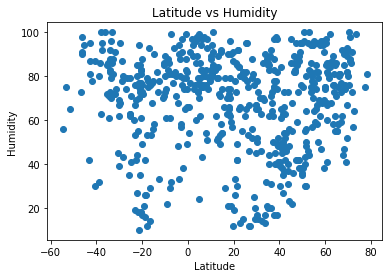

In [13]:
plt.figure(figsize = (6,4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#save the plot
plt.savefig('lat_v_hum.png')
plt.show()

The result is fairly distributed throughout. However there seem to be more countries with higher humidity. 

## Cloudiness (%) vs. Latitude

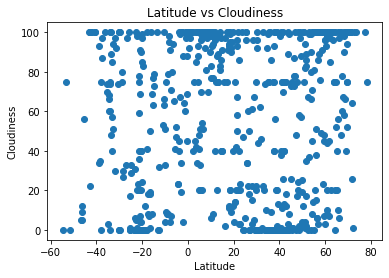

In [14]:
plt.figure(figsize = (6, 4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'])
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#save the plot
plt.savefig('lat_v_cloud.png')
plt.show()

There does not seem to be a relationship is detected bewtween cloudiness and latitude.

## Wind Speed (mph) vs. Latitude

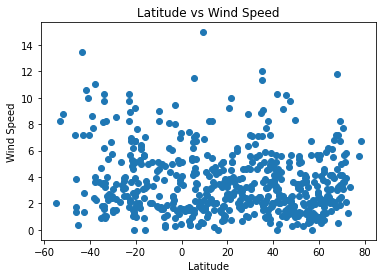

In [15]:
plt.figure(figsize = (6, 4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'])
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#save the plot
plt.savefig('lat_v_wind.png')
plt.show()

Overall most cities experience lower wind speed at the equator and both north and south poles

## Part 1B

In [16]:
# latitudes northern/southern hemisphere
north_hem = clean_city_data.loc[clean_city_data["Lat"] >= 0]

south_hem = clean_city_data.loc[clean_city_data["Lat"] < 0] 


## Northern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: 0.4675198205053765


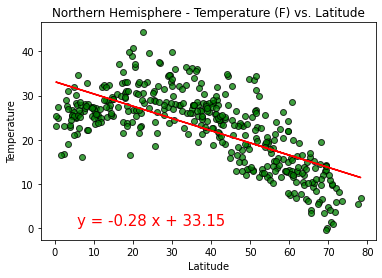

In [26]:
x_values = north_hem["Lat"]
y_values = north_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values, facecolors="green", edgecolors="black", alpha=0.75, label = line_eq)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")

#save the plot
plt.savefig('North_Hem-Temperature_Latitude.png')
plt.show()

## Southern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: 0.5997087677581032


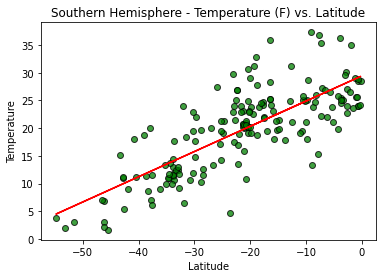

In [27]:
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values, facecolors="green", edgecolors="black", alpha=0.75, label = line_eq)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")

#save the plot
plt.savefig('South_Hem-Temperature_Latitude.png')
plt.show()

## Northern Hemisphere - Humidity (%) vs. Latitude

The r-squared is: 0.0003735955374821696


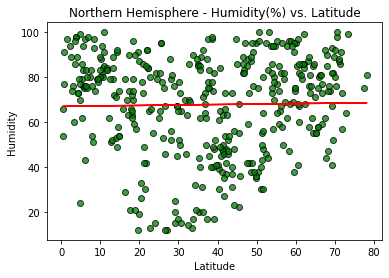

In [35]:
x_values = north_hem["Lat"]
y_values = north_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values, facecolors="green", edgecolors="black", alpha=0.75, label = line_eq)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.title('Northern Hemisphere - Humidity(%) vs. Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

#save the plot
plt.savefig('North_Hem-Humidity_Latitude.png')
plt.show()

## Southern Hemisphere - Humidity (%) vs. Latitude

The r-squared is: 0.008062686244211142


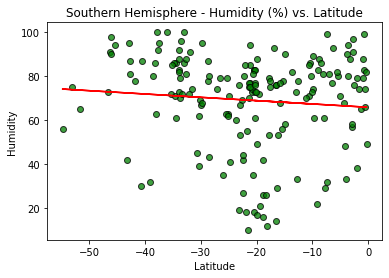

In [29]:
x_values = south_hem["Lat"]
y_values = south_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values, facecolors="green", edgecolors="black", alpha=0.75, label = line_eq)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

#save the plot
plt.savefig('South_Hem-Humidity_Latitude.png')
plt.show()

## Northern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: 0.001088725228696965


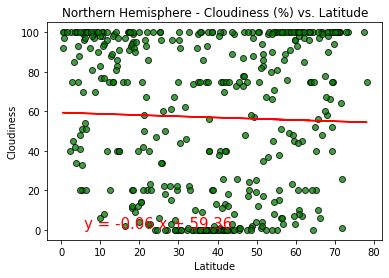

In [30]:
x_values = north_hem["Lat"]
y_values = north_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values, facecolors="green", edgecolors="black", alpha=0.75, label = line_eq)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

#save the plot
plt.savefig('North_Hem-Cloudiness_Latitude.png')
plt.show()

## Southern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: 0.0027999020380377443


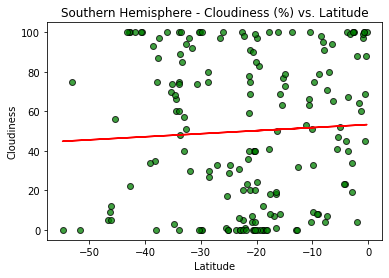

In [31]:
x_values = south_hem["Lat"]
y_values = south_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values, facecolors="green", edgecolors="black", alpha=0.75, label = line_eq)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

#save the plot
plt.savefig('South_Hem-Cloudiness_Latitude.png')
plt.show()

## Northern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: 1.7803768547636694e-05


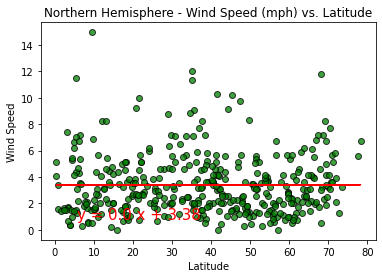

In [32]:
x_values = north_hem["Lat"]
y_values = north_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values, facecolors="green", edgecolors="black", alpha=0.75, label = line_eq)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

#save the plot
plt.savefig('North_Hem-Wind Speed_Latitude.png')
plt.show()

## Southern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: 0.028455623858294504


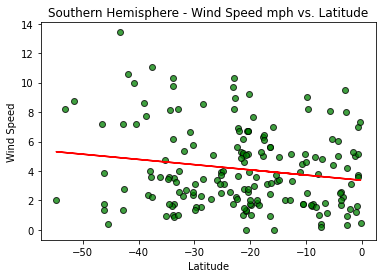

In [33]:
x_values = south_hem["Lat"]
y_values = south_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values, facecolors="green", edgecolors="black", alpha=0.75, label = line_eq)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.title('Southern Hemisphere - Wind Speed mph vs. Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

#save the plot
plt.savefig('South_Hem-Wind Speed_Latitude.png')
plt.show()

## Observations 
### Temperature and Latitude
#### A) There is a negative relationship in the northern hemisphere between Temperature and Latitude. Temperature decreases as you move away from the equator. 
#### B) Unlike the northern hemisphere, there is a strong positive relationship between temperature and latitude in the southern hemisphere. Temperature increases as we head to the equator
### Humidity and Latitude
#### There doesnt seem to be any relationship between humidity and latitude in both the Northern and Southern hemispheres. R-squared values are 0.00037 and 0.00806 form the north and south.
### Cloudiness and Latitude
#### Just like the relationship with humidity, there is almost no relationship again with cloudiness. R squared numbers for north and south hemispheres are 0.00109 and 0.0028
 